In [23]:
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('gregorut/videogamesales', path ='data/', unzip=True)

KeyError: 'content-length'

In [24]:
!pip install --upgrade kaggle

### kindly note that I have tried downloading the dataset directly from kaggle but have been facing issues due to which I am importing the dataset directly from my pc. (I am facing same issue using urllib and retrieve.)

#Providing more info about this dataset:
- Url: https://www.kaggle.com/datasets/gregorut/videogamesales
- api: kaggle datasets download -d gregorut/videogamesales
- name: Video Game Sales


In [63]:
#importing necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing csv file into a pandas dataframe
df = pd.read_csv('vgsales.csv')

In [64]:
#viewing few elements of the top of the dataframe
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### The dataset contains a list of video games with sales greater than 100,000 copies

In [65]:
#describing the shape of the dataframe
df.shape

(16598, 11)

### we can see that the 2-D dataframe has 16598 rows and 11 columns in total.

In [66]:
#shows some certain mathematical data for this dataframe.
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### we can see that some of the data might be inconsistent. For eg., The coloumn has a count of 16327 entries for a total of 16598 entries in other attributes. This means that there are null values presesnt in the coloumn Year which will require cleanup.

### we can also study some other important aspects of the dataset using describe. For eg., we can see that the starting year for this dataset is the year 1980 and the ending year is 2020.

In [67]:
#some more insights into the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [68]:
#checking for the null values
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### As mentioned above, the dataset contains null values for the attribute 'Year' and also for 'Publisher'

In [69]:
# dropping all the null values
df = df.dropna()

#verifying whether there are any more null values
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

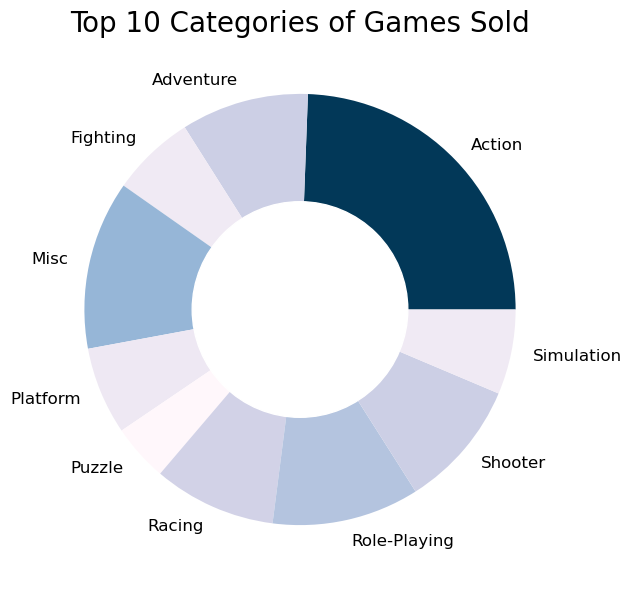

In [70]:
# Import the matplotlib library
import matplotlib as mpl

# Group the dataframe by Genre and count the number of Global_Sales
# Then select the top 10 genres
game = df.groupby("Genre")["Global_Sales"].count().head(10)

# Create a custom color map that maps the game counts to colors
# using the PuBu colormap
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]

# Create a figure with a size of 7 by 7 inches
plt.figure(figsize=(7,7))

# Plot a pie chart of the game counts with the corresponding labels and colors
plt.pie(game, labels=game.index, colors=colours)

# Create a white circle at the center of the pie chart
central_circle = plt.Circle((0, 0), 0.5, color='white')

# Get the current figure and add the circle to it
fig = plt.gcf()
fig.gca().add_artist(central_circle)

# Set the font size to 12
plt.rc('font', size=12)

# Set the title of the plot with a font size of 20
plt.title("Top 10 Categories of Games Sold", fontsize=20)

# Show the plot on the screen
plt.show()

### A comparison of game sales by category

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178027 -0.400315 -0.379137 -0.269323    -0.332735   
Year          0.178027  1.000000 -0.091285  0.006108 -0.169387     0.041128   
NA_Sales     -0.400315 -0.091285  1.000000  0.768923  0.451283     0.634518   
EU_Sales     -0.379137  0.006108  0.768923  1.000000  0.436379     0.726256   
JP_Sales     -0.269323 -0.169387  0.451283  0.436379  1.000000     0.290559   
Other_Sales  -0.332735  0.041128  0.634518  0.726256  0.290559     1.000000   
Global_Sales -0.426975 -0.074647  0.941269  0.903264  0.612774     0.747964   

              Global_Sales  
Rank             -0.426975  
Year             -0.074647  
NA_Sales          0.941269  
EU_Sales          0.903264  
JP_Sales          0.612774  
Other_Sales       0.747964  
Global_Sales      1.000000  


C:\Users\ace9665\AppData\Local\Temp\ipykernel_22056\1634559005.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


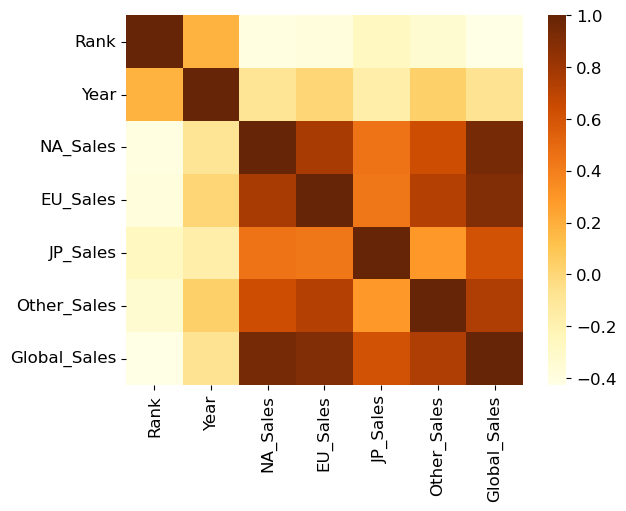

In [71]:
# Compute and print the correlation matrix of the dataframe
corr_matrix = df.corr()
print(corr_matrix)

# Plot a heatmap of the correlation matrix using a yellow-orange-brown colormap
sns.heatmap(corr_matrix, cmap="YlOrBr")

# Show the heatmap on the screen
plt.show()

### After studying the correlation between the data we can make out certain assumptions after visually studying the dataset. For eg., We can see the impact of global sales directly on NA_Sales and vice versa.

# Machine Learn code : 

### The code will use two different machine learning models, a decision tree regressor and a linear regression model, to predict the global sales of video games based on their rank and sales in different regions. 

In [72]:
# converting dependent(Global Sales) and independent variables
## (Rank, NA_Sales, EU_Sales, JP_Sales, Other_Sales) into two separate data frames: x and y
x = df[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = df["Global_Sales"]

In [73]:
#Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets, with 80% of the data for training and 20% for testing
# Set a random seed of 42 for reproducibility
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Decision Tree:

In [74]:
# Import the DecisionTreeRegressor class from the sklearn.tree module
from sklearn.tree import DecisionTreeRegressor

# Create and train a decision tree regressor model
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)

# Make predictions on the testing data using the decision tree model
predictions = model.predict(xtest)

In [75]:
# print the predictions
predictions

array([0.57, 0.07, 0.19, ..., 0.09, 0.13, 0.19])

# Linear Regression Model:

In [76]:
# Import the LinearRegression class from the sklearn.linear_model module
from sklearn.linear_model import LinearRegression

# Create and train a linear regression model
model = LinearRegression()
model.fit(xtrain, ytrain)

# Make predictions on the testing data using the linear regression model
predictions = model.predict(xtest)

In [77]:
# print the predictions
predictions

array([0.56992573, 0.06056453, 0.19027598, ..., 0.09048589, 0.13035485,
       0.18025191])

# Notes: 

- At the moment I do not have the actual values of the predictions or the evaluation metrics, so it is hard to draw a conclusion about the performance of the models.

- We can see that the results using both the models are pretty similar although The code is not using any feature scaling or transformation, which might affect the accuracy of the models.

- The code is not using any cross-validation or regularization techniques, which might help to prevent overfitting or underfitting of the models.


# Improvements that could be made:

- Would properly make a comparison after getting actual values or evaluation metrics using sklearn.metrics
- Could use feature scaling or transformation to make the data more suitable for the linear regression model.
- Could use cross-validation or regularization techniques to reduce the variance or bias of the models.
